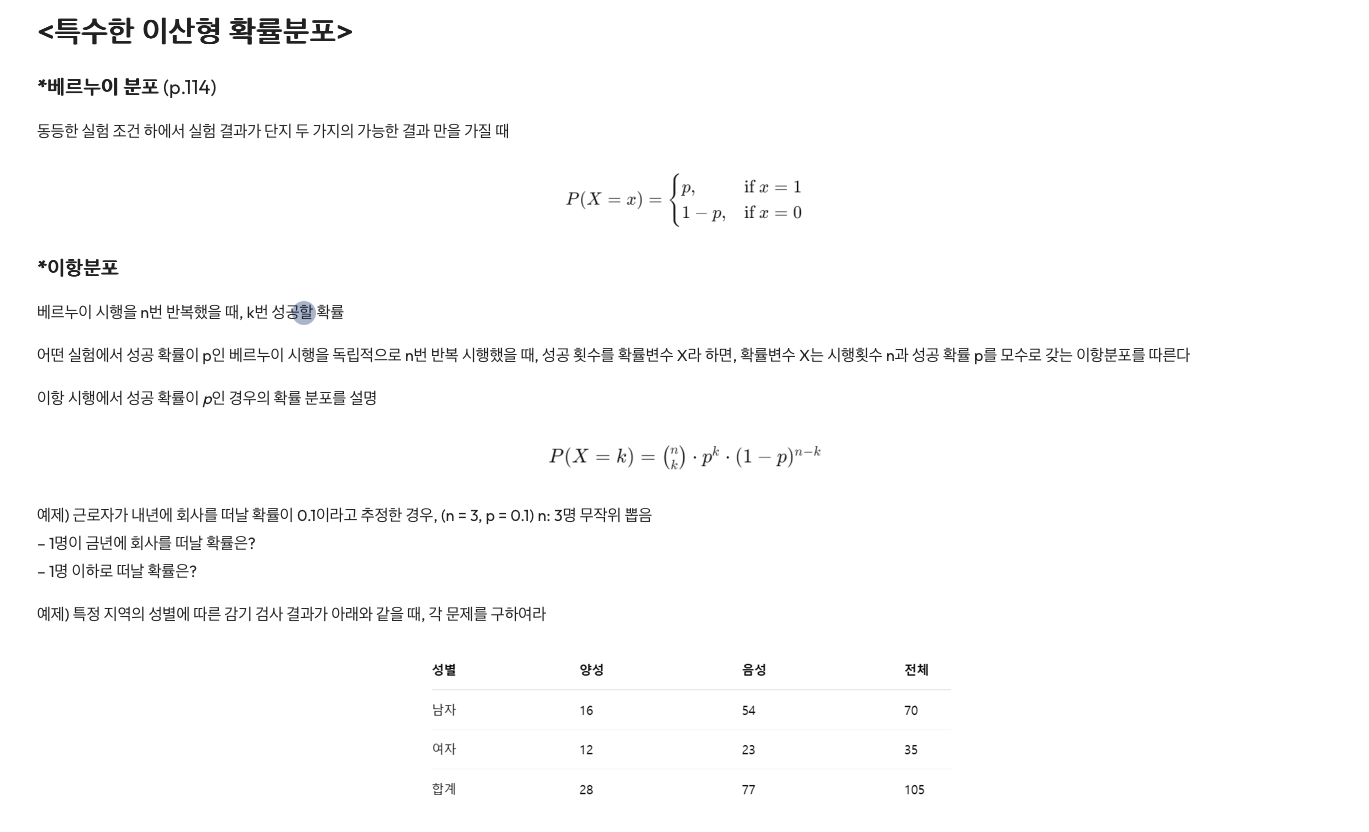

In [1]:
from scipy.stats import binom

# 예제1) 5명의 사람을 임의로 선택하였을 때, 감기에 양성 반응인 사람이 1명일 확률은?
p = 28 / 105  # ≈ 0.2667
n = 5
prob1 = binom.pmf(1, n, p)    # ≈ 0.3937

# 예제2) 12명의 사람을 임의로 선택하였을 때, 감기에 양성 반응인 사람이 6명 이상일 확률은?
n = 12
prob2 = 1 - binom.cdf(5, n, p)    # ≈ 0.1223

# 예제3) 4명의 남자, 2명의 여자가 임의로 선택되었을 때, 감기에 양성 반응인 사람이 없을 확률은?
p_m = 16 / 70
p_f = 12 / 35

p_all_male_neg = (1 - p_m) ** 4
p_all_female_neg = (1 - p_f) ** 2

prob_all_negative = p_all_male_neg * p_all_female_neg    # ≈ 0.2599

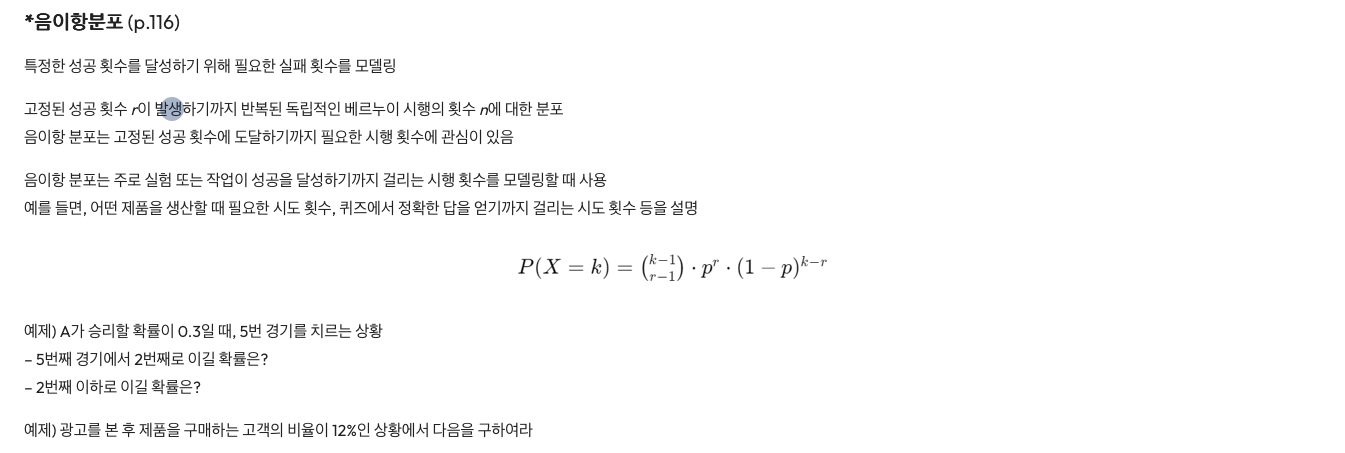

In [ ]:
from scipy.stats import nbinom

r = 3
p = 0.12

# 예제1) 평균적으로 몇 명이 광고를 본 후 첫 구매가 발생하는가?
prob1 = 1 / p    # 8.33

# 예제2) 적어도 3명의 고객이 제품을 구매하기까지 광고를 본 고객 수가 10명을 초과할 확률은 얼마인가?
# nbinom: 실패 횟수 기반이므로 성공 3번 → 총 시도 수 = 실패 + 성공 = X
# P(X > 10) = 1 - P(X <= 7) 
prob2 = 1 - nbinom.cdf(7, r, p)    # ≈ 0.7224

# 예제3) 5명의 구매자가 나올 때까지 필요한 광고 대상 고객 수의 기대값과 분산
expected_total_customers = r / p    # 기대값 ≈ 41.67
variance_total_customers = r * (1 - p) / (p ** 2)    # 분산 ≈ 305.56

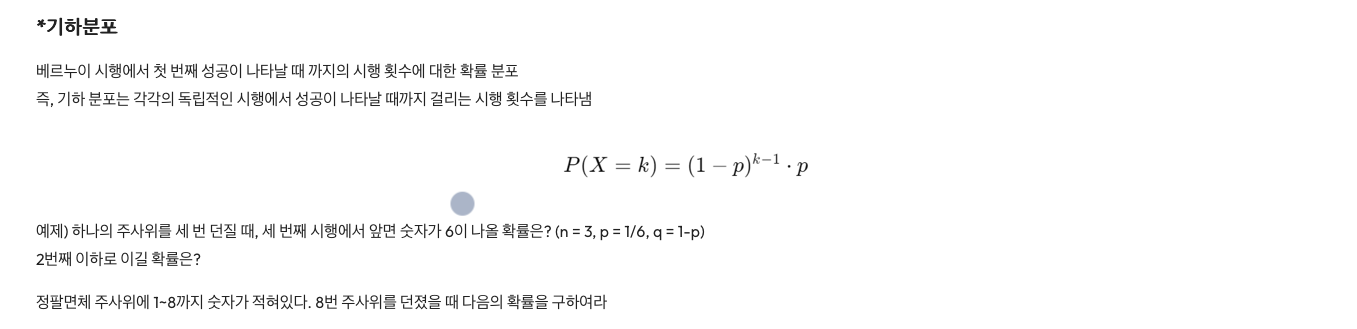

In [ ]:
; 정팔면체 주사위에 1~8까지 숫자가 적혀있다. 8번 주사위를 던졌을 때 다음의 확률을 구하여라
from scipy.stats import binom

# (1) 숫자 1이 한 번만 나오는 경우
p1 = binom.pmf(1, n=8, p=1/8)

# (2) 숫자 2 또는 4가 5회 이상 나오는 경우
p2 = 1 - binom.cdf(4, n=8, p=2/8)

# (3-1) 숫자 3이 적어도 3회 나오는 경우
p3 = 1 - binom.cdf(2, n=8, p=1/8)

# (3-2) 숫자 5가 많아야 3회 나오는 경우
p4 = binom.cdf(3, n=8, p=1/8)

print(f"(1) 숫자 1이 한 번 나올 확률: {p1:.4f}")
print(f"(2) 숫자 2 또는 4가 5회 이상 나올 확률: {p2:.4f}")
print(f"(3-1) 숫자 3이 적어도 3회 나올 확률: {p3:.4f}")
print(f"(3-2) 숫자 5가 많아야 3회 나올 확률: {p4:.4f}")

; 한 스타트업 회사가 새로운 제품을 출시하였고, 각 고객 방문 시 제품 구매 확률이 0.1이라고 할 때 다음의 확률을 구하여라
from scipy.stats import geom

p = 0.1

# (1) 4번째 성공 확률
prob_4 = geom.pmf(4, p)

# (2) 5명 이하 방문 중 1명 이상 구매 확률
prob_leq_5 = geom.cdf(5, p)

print(f"(1) 4번째 고객이 첫 구매자일 확률: {prob_4:.4f}")
print(f"(2) 5명 이하 방문 중 최소 1명 구매 확률: {prob_leq_5:.4f}")

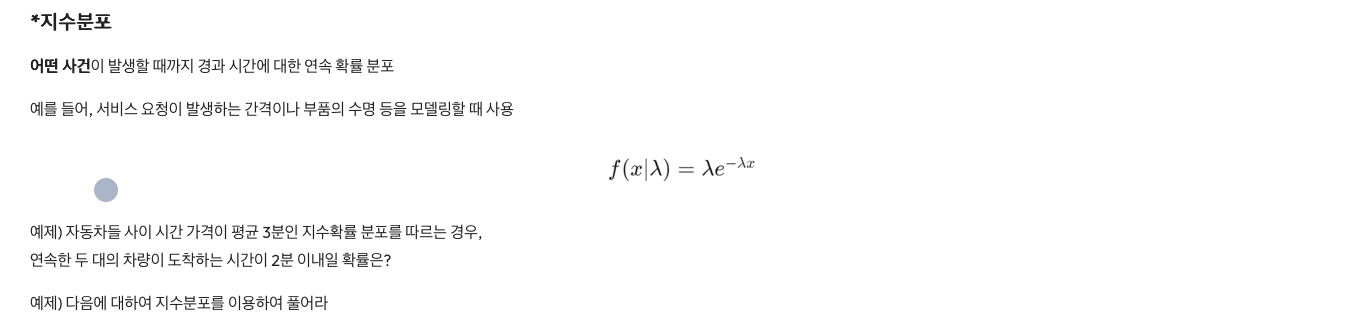

In [ ]:
from scipy.stats import expon

λ = 2
scale = 1 / λ

# (1) 평균 사건 발생률이 분 당 2회인 시스템에서, 다음 사건이 발생하기까지 1분 이내일 확률은 얼마인가?
prob_1min = expon.cdf(1, scale=scale)    # 0.8647

# (2) 같은 시스템에서, 다음 사건이 발생하기까지 3분 이상 걸릴 확률은 얼마인가?
prob_over_3 = expon.sf(3, scale=scale)    #0.0025

# (3) 해당 시스템에서 다음 사건이 발생하기까지 시간의 기대 값과 표준편차는 얼마인가?
expected = scale    # 0.5
std_dev = scale    # 0.5

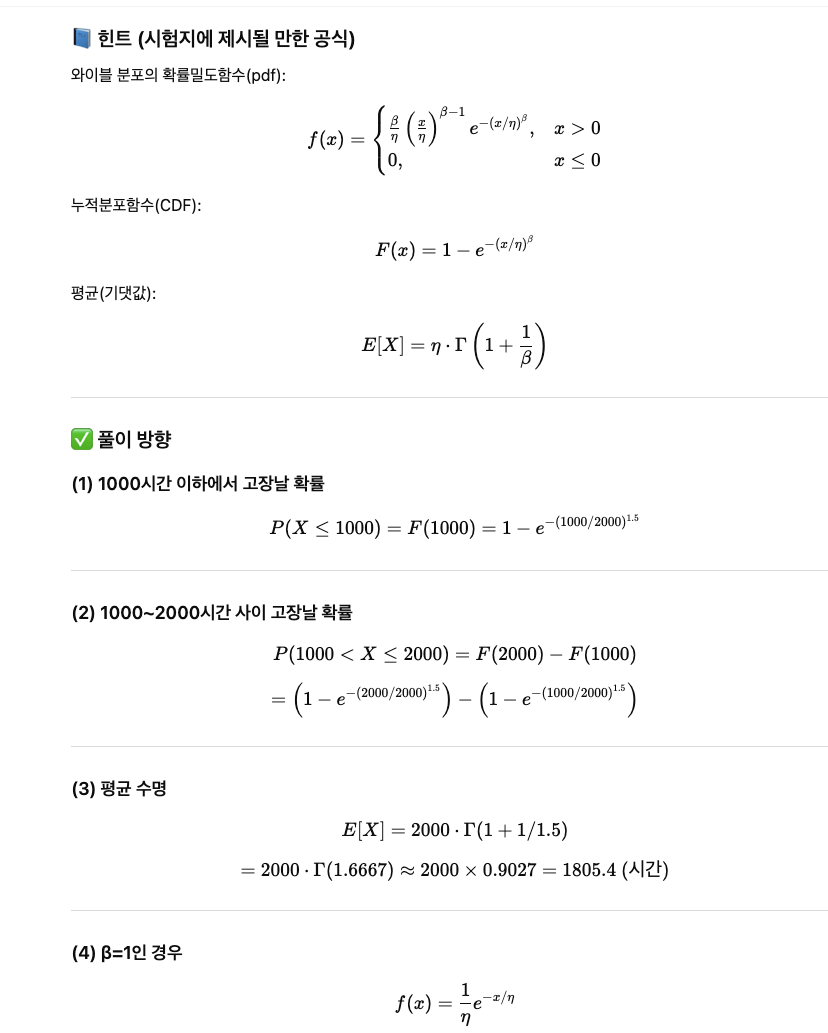

In [ ]:
from scipy.stats import weibull_min
import numpy as np
from scipy.special import gamma

beta = 1.5
eta = 2000

# 1) P(X ≤ 1000)
p1 = weibull_min.cdf(1000, c=beta, scale=eta)

# 2) P(1000 < X ≤ 2000)
p2 = weibull_min.cdf(2000, c=beta, scale=eta) - p1

# 3) 평균 수명
mean = eta * gamma(1 + 1/beta)

print(f"P(X ≤ 1000) = {p1:.4f}")
print(f"P(1000 < X ≤ 2000) = {p2:.4f}")
print(f"E[X] = {mean:.2f}")


| 문항  | 답                 | 해설                          |
| --- | ----------------- | --------------------------- |
| (1) | 0.2978            | 29.78% 확률로 1000시간 내 고장      |
| (2) | 0.4680            | 46.8% 확률로 1000~2000시간 사이 고장 |
| (3) | 1805.4            | 평균 수명 약 1805시간              |
| (4) | 지수분포(Exponential) | β=1일 때 와이블 → 지수분포           |


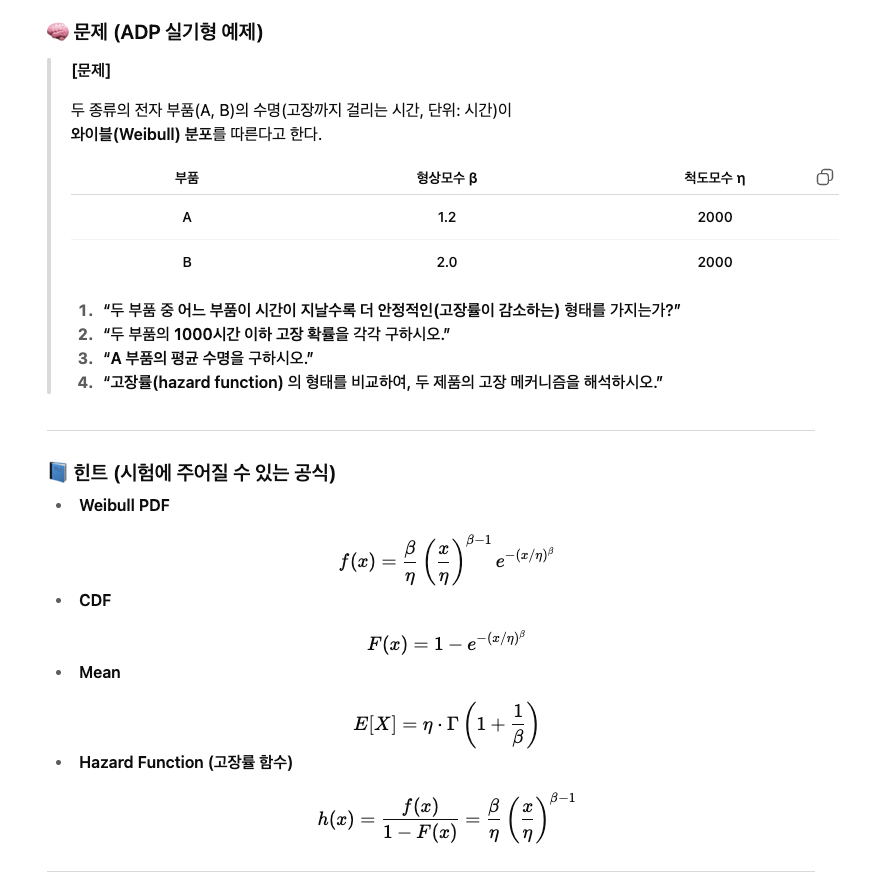
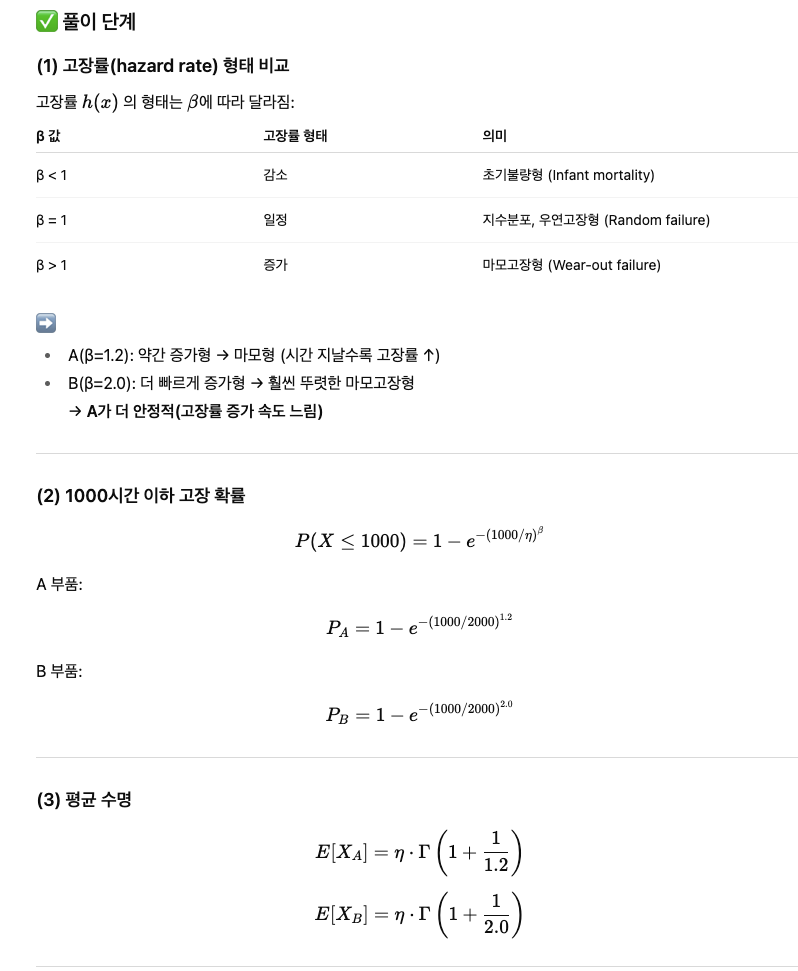

In [ ]:
from scipy.stats import weibull_min
from scipy.special import gamma

# 파라미터
eta = 2000
beta_A = 1.2
beta_B = 2.0

# 1) 고장 확률 (1000시간 이하)
P_A = weibull_min.cdf(1000, c=beta_A, scale=eta)
P_B = weibull_min.cdf(1000, c=beta_B, scale=eta)

# 2) 평균 수명
E_A = eta * gamma(1 + 1/beta_A)
E_B = eta * gamma(1 + 1/beta_B)

print(f"A: P(X≤1000)={P_A:.4f},  E[X]={E_A:.2f}")
print(f"B: P(X≤1000)={P_B:.4f},  E[X]={E_B:.2f}")


# from scipy.special import gamma, gammaln, gammainc, gammaincc

# gamma(3.5)         # Γ(3.5)
# gammaln(50)        # ln Γ(50)  (큰 값엔 log가 안정적)
# gammainc(a, x)     # 정규화 '불완전 감마함수' P(a, x)
# gammaincc(a, x)    # 1 - P(a, x)


| 항목          | A 부품                  | B 부품     | 비교            |
| ----------- | --------------------- | -------- | ------------- |
| 형상모수 β      | 1.2                   | 2.0      | B가 더 큼        |
| 고장률 형태      | 점진적 증가                | 급격한 증가   | A가 더 안정적      |
| P(X ≤ 1000) | 0.331                 | 0.221    | B가 초기 고장 덜 발생 |
| 평균 수명       | 1781.1시간              | 1770.8시간 | 거의 동일         |
| 해석          | A는 완만한 마모형, B는 빠른 마모형 | —        |               |

결론 (ADP 답안식으로 정리)

① β값이 클수록 시간이 지남에 따라 고장률이 급격히 증가하므로
B 부품은 마모 고장이 더 빠르게 발생하는 제품이다.

② 1000시간 이내 고장 확률은 A가 더 높지만,
장시간 사용 시 B의 고장률 증가가 더 가파르다.

③ 따라서 A 부품이 장기 운용 시 상대적으로 더 안정적이다.

④ β=1일 경우 지수분포가 되어 고장률이 일정하며,
β>1일수록 마모형, β<1일수록 초기불량형을 의미한다.

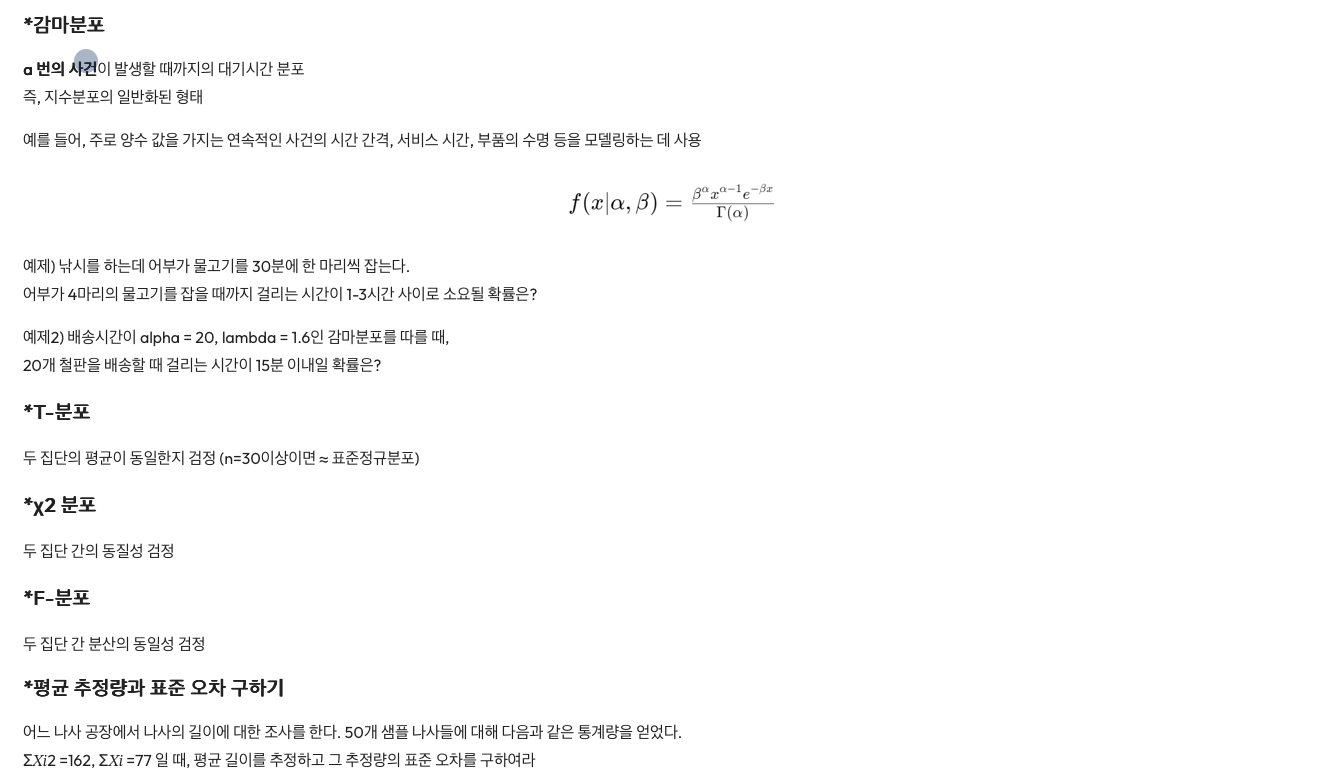

In [ ]:
import numpy as np

# 주어진 값
n = 50
sum_x = 77
sum_x2 = 162

# (1) 표본 평균
mean = sum_x / n

# (2) 표본 분산 (n - 1 분모 사용)
variance = (sum_x2 - (sum_x ** 2) / n) / (n - 1)

# (3) 표본 표준편차
std_dev = np.sqrt(variance)

# (4) 표준 오차 (Standard Error)
standard_error = std_dev / np.sqrt(n)

점추정, 구간추정> – 모평균, 모비율, 모분산

[일표본 (One-sample)]

*모평균 추정과 가설 검정: Z분포, t분포 (p.137)

※ 표본 크기가 30 이상, 혹은 모집단 분산 아는 경우: Z분포
※ 표본 크기가 30 미만 & 모집단 분산 모르는 경우: t분포

*예제) 12건의 광고 시간 측정, 평균 15.5초, 분산 3.2초일 때, 모평균의 90% 신뢰구간을 추정하시오

1. 모표준편차를 아는 경우, 모평균 추정
x = 31100, n = 36, sigma = 4500, conf_a = 0.05
conf_z = norm.ppf(1 – conf_a / 2)
ME = conf_z * SE
→ 구간 추정량: (x – ME, x + ME)

2. 오차의 한계(ME)가 500 이하일 확률이 0.95가 되도록 모집단 평균의 추정치를 원하는 경우 → 표본 규모는?
ME = 500, conf_a = 1 – 0.95

3. 모평균의 가설 검정 → 검정통계량, 유의확률 등 계산
※ mu0 = 30000 # 귀무가설의 모평균

*모비율 추정과 가설 검정: Z분포 (p.140)

*예제) 철강제품 불량률이 0.9인 경우, 오차 한계가 5%되는 최소 표본 사이즈는?

1. 모비율 추정
n = 500, p = 220/500 (표본 비율), conf_a = 0.05
conf_z = norm.ppf(1 – conf_a / 2)
ME = conf_z * SE
→ 구간 추정량: (p – ME, p + ME)

2. 오차의 한계가(ME)가 0.03 이하일 확률이 0.99가 되도록 모집단 비율의 추정치를 원하는 경우 → 표본 규모는?
ME = 0.03, conf_a = 1 – 0.99

3. 모비율의 가설 검정 → 검정통계량, 유의확률 등 계산
※ p0 = 0.5 # 귀무가설의 모비율

*모분산 추정과 가설 검정: 카이제곱분포 (p.142)

*예제) 표본 10개 분산이 90일 때, 신뢰도 95%, 모분산의 신뢰 구간은?

1. 모평균을 모르는 경우 → 모분산의 추정
n = 10, v = 3.4, df = n-1, conf_a = 0.05
conf_c1 = chi2.ppf(1 – conf_a / 2, df)
conf_c2 = chi2.ppf(conf_a / 2, df)
CR1 = df * v / conf_c1
CR2 = df * v / confc2
→ 구간 추정량: (CR1, CR2)

2. 모분산의 가설 검정 → 검정통계량, 유의확률 등 계산
※ v0 = 3.6 # 귀무가설의 모분산

[이표본 (Two-sample)] (p.144)

*독립표본 모평균 차이 추정과 가설 검정
※ 표본 크기가 30 이상: Z분포
※ 표본 크기가 30 미만, 모집단 분산 모르지만, 두 모집단 분산이 같다는 것을 알고 있는 경우: t분포
※ 표본 크기가 30 미만, 모집단 분산 모르지만, 두 모집단 분산이 다르다는 것을 알고 있는 경우: t분포 + df 차이
→ 모집단의 분산을 모를 때는, 표본 크기가 크더라도 t분포를 사용하는 것이 일반적

예제) A 생산라인 제품 평균 5.7mm, 표준편차 0.03, B는 ~~ → 두 제품 평균 차이가 있는지

In [ ]:
import math

mean_A = 5.7
std_A = 0.03

mean_B = 5.6
std_B = 0.04

mean_diff = mean_A - mean_B

# 표준오차 (Standard Error)
se = math.sqrt(std_A**2 + std_B**2)

# z-통계량 계산
z = mean_diff / se

# 유의수준 5% 기준 단측 임계값
z_critical = 1.65

print(f"z 통계량: {z:.4f}")
print(f"z 임계값 (유의수준 0.05, 단측): {z_critical}")

if z > z_critical:
    print("귀무가설 기각: 두 생산라인 평균에 유의한 차이가 있음 (A > B)")
else:
    print("귀무가설 채택: 두 생산라인 평균 차이는 통계적으로 유의하지 않음")

*대응표본 모평균 차이 추정과 가설 검정
※ 표본 크기가 30 이상: Z분포
※ 표본 크기가 30 미만: t분포
→ 표본 크기가 30명 이상이면 이론적으로는 z-분포를 사용할 수 있지만,
모집단의 분산을 모를 때는 여전히 t분포를 사용하는 것이 일반적

*모비율 차이의 추정과 가설 검정: Z분포

예제) 남 100명, 30% 호감, 여 180명, 35% 호감 → 남녀 별로 지지율에 차이가 있는지

*모분산 비의 추정과 가설 검정: F분포

*연속 분포 따르는지 검정

*포아송 분포 따르는지 검정하는 예제

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import poisson, chisquare, kstest

df["최대지연시간"] = df["최대지연시간"].astype(str).str.replace(r"[^\d]", "", regex=True)
df["최대지연시간"] = pd.to_numeric(df["최대지연시간"], errors="coerce")  #숫자로 변환 (빈 문자열 → NaN)
df = df.dropna(subset=["최대지연시간"])
df["최대지연시간"] = df["최대지연시간"].astype(int)

df["지연일자"] = pd.to_datetime(df["지연일자"])

filtered = df[(df["최대지연시간"] >= 5) & (df["최대지연시간"] <= 15)]
daily_counts = filtered.groupby("지연일자").size()

## 방법 1: 카이제곱 적합도 검정
obs_counts = daily_counts.value_counts().sort_index()
mean_lambda = daily_counts.mean()
print(obs_counts)

# 푸아송 확률 × 전체 사건 수 → 기대빈도
poisson_probs = poisson.pmf(obs_counts.index, mu=mean_lambda)
expected_counts = poisson_probs * obs_counts.sum()
expected_counts = expected_counts * (obs_counts.sum() / expected_counts.sum())  # 정규화

# 카이제곱 검정
chi2_stat, p_chi2 = chisquare(f_obs=obs_counts, f_exp=expected_counts)

## 방법 2: Kolmogorov–Smirnov 검정 (정규성 대신 푸아송 가정)
ks_stat, p_ks = kstest(daily_counts, cdf="poisson", args=(mean_lambda,))

# === 5. 결과 출력 ===
print("== 방법 1: Chi-squared Test ==")
print(f"Chi2 통계량: {chi2_stat:.3f}, p-value: {p_chi2:.4f}")

print("\n== 방법 2: K-S Test (Poisson 가정) ==")
print(f"KS 통계량: {ks_stat:.3f}, p-value: {p_ks:.4f}")

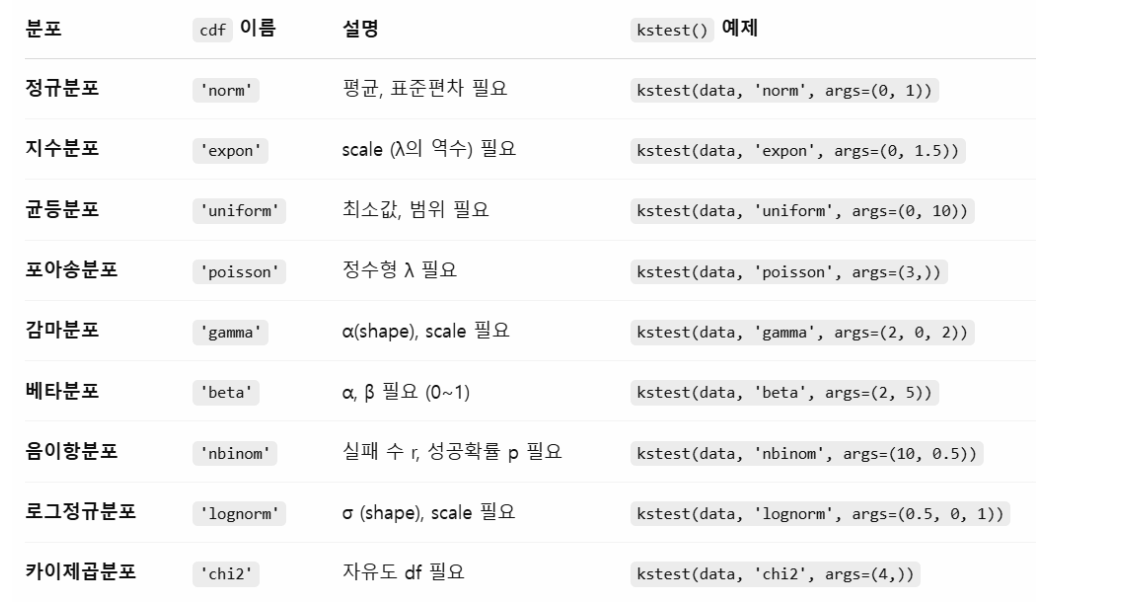

In [ ]:
from scipy.stats import kstest, norm, expon, uniform, poisson, gamma, beta, nbinom, lognorm, chi2
import numpy as np

results = {}

# 정규분포
data = np.random.normal(loc=0, scale=1, size=100)
results["norm"] = kstest(data, 'norm', args=(0, 1))

# 지수분포
data = np.random.exponential(scale=1.5, size=100)
results["expon"] = kstest(data, 'expon', args=(0, 1.5))

# 균등분포
data = np.random.uniform(0, 10, size=100)
results["uniform"] = kstest(data, 'uniform', args=(0, 10))

# 포아송분포
data = np.random.poisson(3, size=100)
results["poisson"] = kstest(data, 'poisson', args=(3,))

# 감마분포
data = np.random.gamma(shape=2, scale=2, size=100)
results["gamma"] = kstest(data, 'gamma', args=(2, 0, 2))

# 베타분포
data = np.random.beta(a=2, b=5, size=100)
results["beta"] = kstest(data, 'beta', args=(2, 5))

# 음이항분포
data = nbinom.rvs(10, 0.5, size=100)
results["nbinom"] = kstest(data, 'nbinom', args=(10, 0.5))

# 로그정규분포
data = np.random.lognormal(mean=0, sigma=0.5, size=100)
results["lognorm"] = kstest(data, 'lognorm', args=(0.5, 0, np.exp(0)))

# 카이제곱분포
data = np.random.chisquare(df=4, size=100)
results["chi2"] = kstest(data, 'chi2', args=(4,))

for dist, res in results.items():
    print(f"{dist.upper()} → KS 통계량: {res.statistic:.3f}, p-value: {res.pvalue:.4f}")

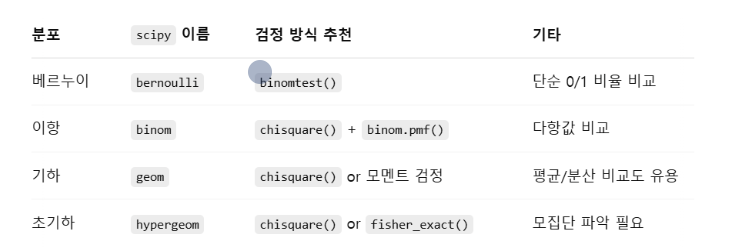

In [ ]:
from scipy.stats import binomtest

# 예: 성공(1) 12회, 총 20회 시도, 기대 성공 확률 0.5
result = binomtest(k=12, n=20, p=0.5)

print("베르누이 검정 (이항검정)")
print(f"p-value: {result.pvalue:.4f}")

import numpy as np
from scipy.stats import binom, chisquare
# *이항분포 적합도 검정: n회 중 k회 성공한 데이터를 바탕으로 이항분포에 적합한지 검정
# 데이터 생성: n=10회 시도, p=0.3 성공 확률
n, p = 10, 0.3
data = np.random.binomial(n=n, p=p, size=1000)

obs_counts = np.bincount(data)
x = np.arange(len(obs_counts))

expected_counts = binom.pmf(x, n=n, p=p) * len(data)
expected_counts = expected_counts * (obs_counts.sum() / expected_counts.sum())  # 기대값 정규화 (총합 맞춤)

chi2_stat, pval = chisquare(f_obs=obs_counts, f_exp=expected_counts)

print("\n이항분포 적합도 검정")
print(f"Chi2 통계량: {chi2_stat:.3f}, p-value: {pval:.4f}")

# *기하분포 적합도 검정: 첫 성공까지 시도한 횟수가 기하분포를 따르는지 확인
from scipy.stats import geom, chisquare
import numpy as np

p = 0.4
data = geom.rvs(p=p, size=1000)

obs_counts = np.bincount(data)[1:]  # geom은 1부터 시작
x = np.arange(1, len(obs_counts) + 1)

expected_counts = geom.pmf(x, p=p) * len(data)

# 마스킹
mask = expected_counts >= 5
obs = obs_counts[mask]
exp = expected_counts[mask]

exp = exp * (obs.sum() / exp.sum())  # 정규화

chi2_stat, pval = chisquare(f_obs=obs, f_exp=exp)

print("\n기하분포 적합도 검정")
print(f"Chi2 통계량: {chi2_stat:.3f}, p-value: {pval:.4f}")

# *초기하분포 검정: 모집단에서 비복원 추출하여 얻은 성공 수가 초기하 분포에 적합한지 검정
from scipy.stats import hypergeom, chisquare
import numpy as np

M, n, N = 50, 20, 10
data = hypergeom.rvs(M=M, n=n, N=N, size=1000)

obs_counts = np.bincount(data)
x = np.arange(len(obs_counts))

expected_counts = hypergeom.pmf(x, M, n, N) * len(data)

# 기대값이 5 미만인 항목 제거
mask = expected_counts >= 5
obs_counts = obs_counts[mask]
expected_counts = expected_counts[mask]

expected_counts = expected_counts * (obs_counts.sum() / expected_counts.sum())  # 정규화

chi2_stat, pval = chisquare(f_obs=obs_counts, f_exp=expected_counts)

print("\n초기하분포 적합도 검정")
print(f"Chi2 통계량: {chi2_stat:.3f}, p-value: {pval:.4f}")

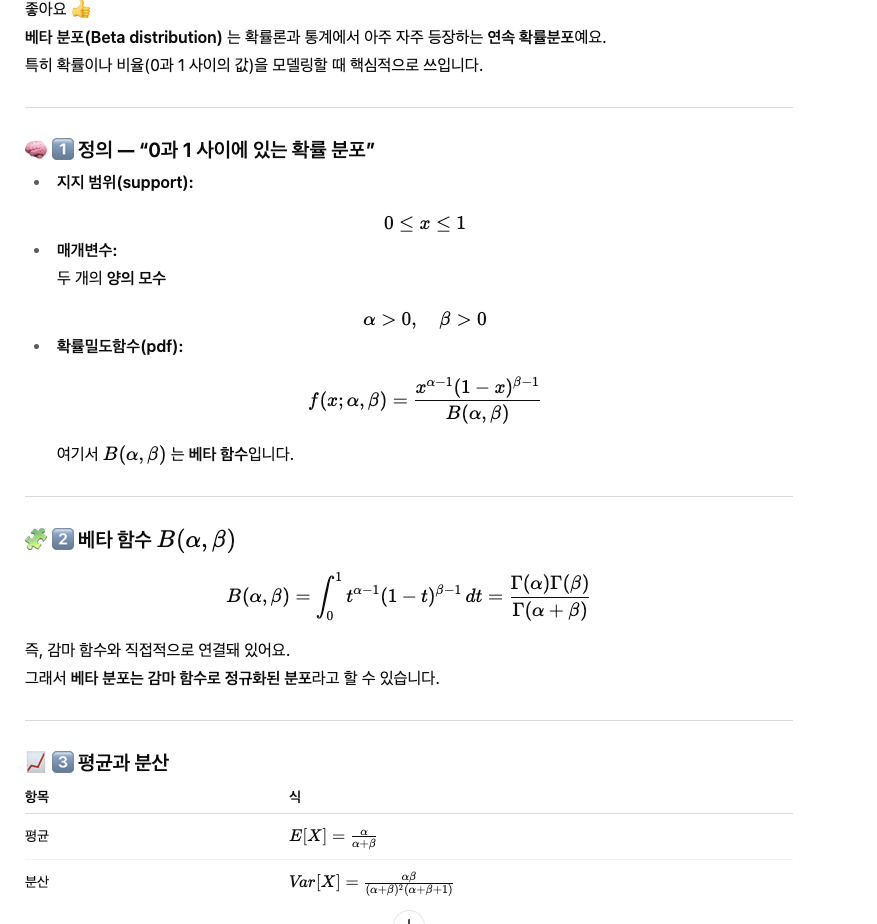

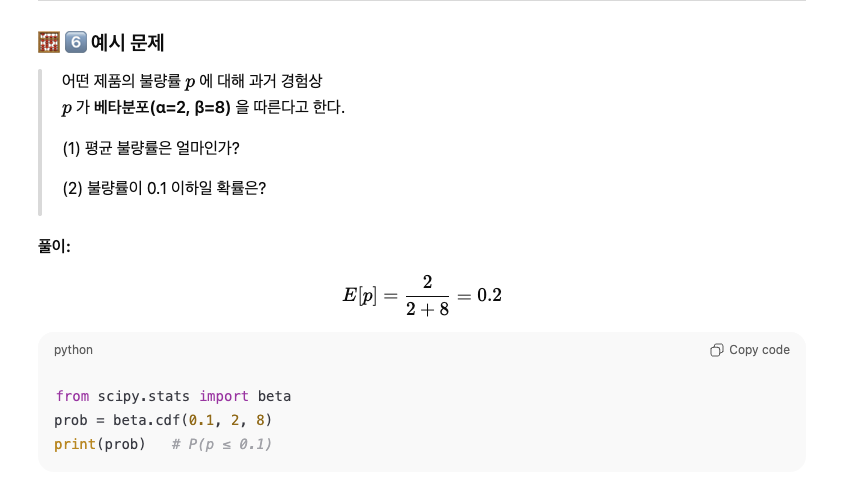